The Problem
1 - Build a classification problem, using the columns x, y and z, trying to classify the label column.

Segregate a test and training frame.
Use a GLM or Logistic Regression model and show the results.
Use other method of your choice to handle the problem
Compare and comment the results on the models used from b) and c)
Step 0: Data Explotation
In this section, we'll see what the data looks like.

Look the spread data
In other hand we show you bellow a graphic we the data in 3D. It is not a good idea bacause 3D graphics, normaly, can't revel much more than numbers. If you look in detail, you'll see a little separetion in red against blue wich are the label of classes. All the data are visible mixed on , this show us that regression will fail, but let's to try to get the statistics numbers before any conclusion.

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


Reading file

In [2]:

df = pd.read_csv("/home/dfilho/vscode/python/df_points.csv")
df.head

<bound method NDFrame.head of          i           x           y           z  label
0        0  326.488285  188.988808 -312.205307    0.0
1        1 -314.287214  307.276723 -179.037412    1.0
2        2 -328.208910  181.627758  446.311062    1.0
3        3 -148.658890  147.027947  -27.477959    1.0
4        4 -467.065931  250.467651 -306.475330    1.0
...    ...         ...         ...         ...    ...
9995  9995 -324.762823 -267.451535   73.363576    1.0
9996  9996 -362.470736  176.772240  138.991471    0.0
9997  9997 -401.675105 -273.322169  230.795823    1.0
9998  9998 -378.615726   73.227279 -368.644222    1.0
9999  9999  274.771830 -140.925809   59.427905    0.0

[10000 rows x 5 columns]>

Ploting data

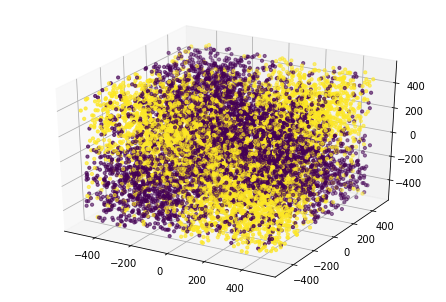

In [3]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df['x'],df['y'],df['z'],c=df['label'],s=10)


Looking for correlation between variables
We try to see any correlation between all variable. The graphs below show us this relationship.

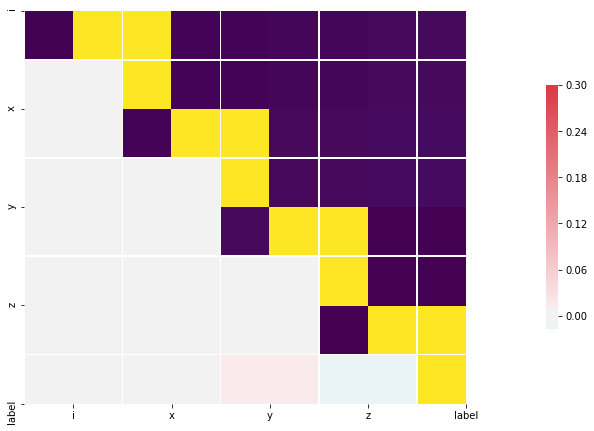

In [29]:
import seaborn as sns
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.imshow(corr)

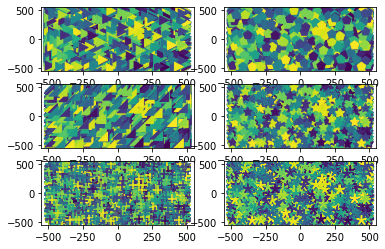

In [42]:
x = df['x']
y = df['y']
z = df['z']

plt.subplot(321)
plt.scatter(x, y, s=80, c=z, marker=">")

plt.subplot(322)
plt.scatter(x, y, s=80, c=z, marker=(5, 0))

verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
plt.subplot(323)
plt.scatter(x, y, s=80, c=z, marker=verts)

plt.subplot(324)
plt.scatter(x, y, s=80, c=z, marker=(5, 1))

plt.subplot(325)
plt.scatter(x, y, s=80, c=z, marker='+')

plt.subplot(326)
plt.scatter(x, y, s=80, c=z, marker=(5, 2))

plt.show()

In [47]:
df.corr()

,i,x,y,z,label
i,1.000000,-0.010560,-0.007151,0.006100,0.008412
x,-0.010560,1.000000,-0.007873,0.000331,0.008928
y,-0.007151,-0.007873,1.000000,0.007636,0.012834
z,0.006100,0.000331,0.007636,1.000000,-0.017716
label,0.008412,0.008928,0.012834,-0.017716,1.000000


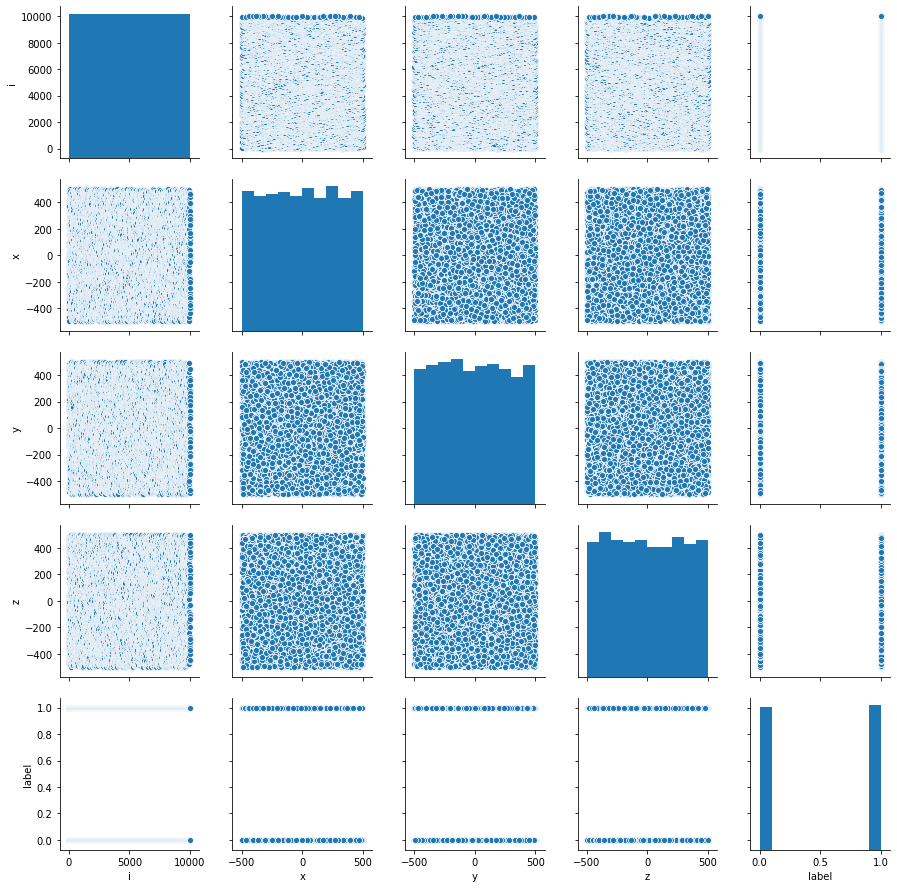

In [63]:
sns.pairplot(df)

In [110]:
import statsmodels.api as sms
from sklearn import linear_model

y = df["label"]
x = df[['x', 'y', 'z']]

regr = linear_model.LinearRegression()
regr.fit(x,y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.5026774706922699
Coefficients: 
 [ 1.56681379e-05  2.27109678e-05 -3.06824513e-05]


In [112]:
X = sms.add_constant(x) # adding a constant
 
model = sms.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.879
Date:                Thu, 05 Dec 2019   Prob (F-statistic):              0.131
Time:                        08:58:35   Log-Likelihood:                -7254.9
No. Observations:               10000   AIC:                         1.452e+04
Df Residuals:                    9996   BIC:                         1.455e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5027      0.005    100.535      0.0

**Looking for Multicollinearity**

In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. That is, a multivariate regression model with collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.

In [114]:
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

y = df['label'] # dependent variable
X = df.drop('label', axis=1)

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

[1.0001970215916902, 1.0000706153758219, 1.0002897709504046, 1.0000811499236926]


**Residual Analysis**
The difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual.

Residual = Observed value - Predicted value e = y − ŷ

Both the sum and the mean of the residuals are equal to zero. That is, Σ**e = 0 and e = 0.

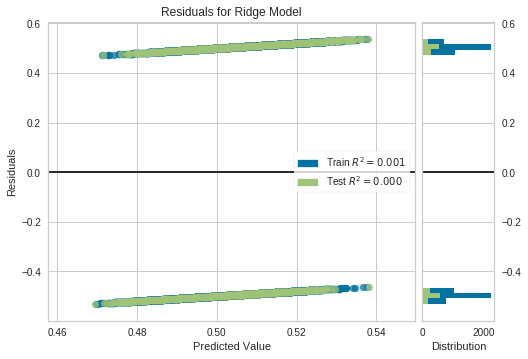

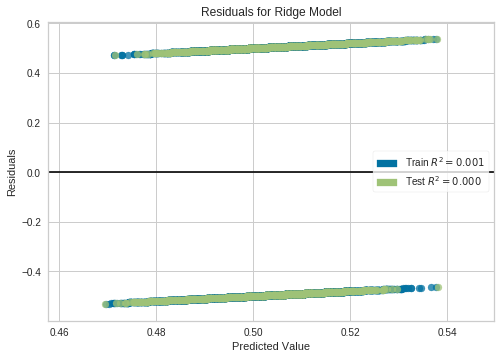

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
Y = df["label"]
X = df[['x', 'y', 'z']]

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()



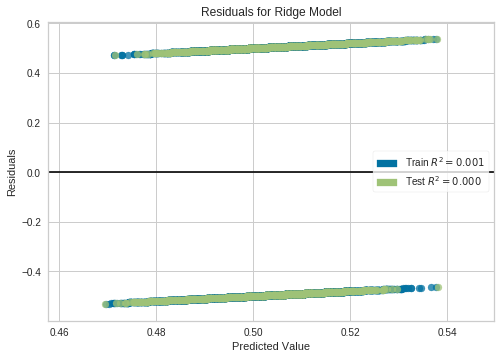

In [131]:
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

**Step 2**

We will try to have more control over the computational nuances of the training and test function, both the number of folds and the number of resampling iterations are equal to 10. Only for repeated cross-validation in k-fold: the number of complete sets of folds for compute it 3. This is more efficient than we have tried so far.

We will use 10 other algorithms besides logistic regression.

Different from split dataset in training and test , we'll to use cross validation.

Cross-validation, sometimes called rotation estimation, or out-of-sample testing is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.

Other attempts with other algorithms
We'll try, again, Logistic Regression using this technique (k-fold) to get better results.

Logistic regression is a classification algorithm traditionally limited to only two-class classification problems. In this case we have no more than two classes (labels), but we'll use the Linear Discriminant Analysis to compare to linear classification technique.

GLMNET Extremely efficient procedures for fitting the entire lasso or elastic-net regularization path for linear regression, logistic and multinomial regression models, Poisson regression and the Cox model.

SVM Radial Support vector machines are a famous and a very strong classification technique which does not use any sort of probabilistic model like any other classifier but simply generates hyperplanes or simply putting lines, to separate and classify the data in some feature space into different regions.

kNN - k-nearest neighbors algorithm In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.

Naive Bayes The Naive Bayes Classifier technique is based on the so-called Bayesian theorem and is particularly suited when the dimensionality of the inputs is high.

Decision Trees are commonly used in data mining with the objective of creating a model that predicts the value of a target (or dependent variable) based on the values of several input (or independent variables).

CART The CART or Classification & Regression Trees methodology was introduced in 1984 by Leo Breiman, Jerome Friedman, Richard Olshen and Charles Stone as an umbrella term to refer to the following types of decision trees.

C5.0 Is an algorithm used to generate a decision tree developed by Ross Quinlan

Bagged CART Bagging ensemble algorithm and the Random Forest algorithm for predictive modeling.

Random Forest Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees

Stochastic Gradient Boosting (Generalized Boosted Modeling) Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [132]:
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.692865
         Iterations 3
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.000     
Dependent Variable: label            AIC:              13863.3004
Date:               2019-12-05 09:14 BIC:              13884.9314
No. Observations:   10000            Log-Likelihood:   -6928.7   
Df Model:           2                LL-Null:          -6931.3   
Df Residuals:       9997             LLR p-value:      0.068851  
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     3.0000                                       
--------------------------------------------------------------------
        Coef.     Std.Err.       z       P>|z|      [0.025    0.975]
--------------------------------------------------------------------
x       0.0001      0.0001     0.9053    0.3653    -0.0001    0.0002
y       0.0001      0.0001     1.2985    0.1941    -0.

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


SyntaxError: unexpected EOF while parsing (<ipython-input-137-a945384e99f9>, line 7)

In [140]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.51
[[ 516  997]
 [ 470 1017]]


In [141]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.52      0.34      0.41      1513
         1.0       0.50      0.68      0.58      1487

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.50      3000
weighted avg       0.51      0.51      0.50      3000



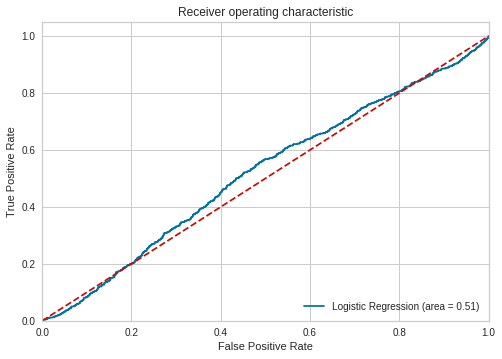

In [142]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
**GLMNET **
Extremely efficient procedures for fitting the entire lasso or elastic-net regularization path for linear regression, logistic and multinomial regression models, Poisson regression and the Cox mo

In [143]:
from glmnet import LogitNet

m = LogitNet()
m = m.fit(X, Y)

/home/dfilho/venv/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/home/dfilho/venv/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
